# Ridge Regression on ContextAware and DecadeAgnostic system

In [3]:
library(tidyverse)
library(caret)
library(glmnet)
library(dplyr)
#library(psych) 
set.seed(1991)

In [4]:
CompoundAware_DecadeAgnostic<-read.csv('CompoundAware_DecadeAgnostic.csv',sep = '\t')

In [6]:
Y <- CompoundAware_DecadeAgnostic %>% select(compound_mean) %>% scale(center = TRUE, scale = FALSE) %>% as.double()
X <- CompoundAware_DecadeAgnostic %>% select(-c(1:8)) %>% as.matrix()

In [7]:
summary(X)

 sim_bw_constituents sim_with_head     sim_with_modifier     log_ratio        
 Min.   :1.820e-06   Min.   :0.00127   Min.   :0.0008125   Min.   :3.200e-07  
 1st Qu.:2.233e-02   1st Qu.:0.09423   1st Qu.:0.0830981   1st Qu.:3.661e-05  
 Median :5.232e-02   Median :0.17094   Median :0.1957016   Median :1.589e-04  
 Mean   :6.281e-02   Mean   :0.20121   Mean   :0.1977876   Mean   :3.019e-03  
 3rd Qu.:9.444e-02   3rd Qu.:0.26726   3rd Qu.:0.2876941   3rd Qu.:1.840e-03  
 Max.   :2.239e-01   Max.   :0.97795   Max.   :0.5513227   Max.   :6.054e-02  
      ppmi            local_mi        
 Min.   :0.06062   Min.   :0.0006622  
 1st Qu.:0.23213   1st Qu.:0.0007116  
 Median :0.31666   Median :0.0008885  
 Mean   :0.30903   Mean   :0.0044666  
 3rd Qu.:0.36827   3rd Qu.:0.0031943  
 Max.   :0.57821   Max.   :0.0768860  

In [12]:
ridge <- train(
  compound_mean ~. -modifier -head -modifier_mean -modifier_std -head_mean -head_std -compound_std, 
    data = CompoundAware_DecadeAgnostic, method = "glmnet",
  trControl = trainControl("cv", number = 10),
  tuneGrid = expand.grid(alpha = 0, lambda = lambda)
  )
# Model coefficients
#coef(ridge$finalModel, ridge$bestTune$lambda)
# Make predictions
#predictions <- ridge %>% predict(test.data)
# Model prediction performance
#data.frame(
#  RMSE = RMSE(predictions, test.data$medv),
#  Rsquare = R2(predictions, test.data$medv)
#)

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."

In [16]:
getTrainPerf(ridge)

TrainRMSE,TrainRsquared,TrainMAE,method
1.275796,0.3974656,1.082903,glmnet


In [15]:
varImp(ridge)

glmnet variable importance

                    Overall
log_ratio           100.000
local_mi             82.006
sim_bw_constituents  44.823
ppmi                  9.684
sim_with_head         7.883
sim_with_modifier     0.000

According to the variable importance study, we see that log ratio and local mutual information are the best two predictors for compositionality ratings, while the similarity ratings are at the bottom 2. Infact the similarity with the modifier plays no role in the prediction.

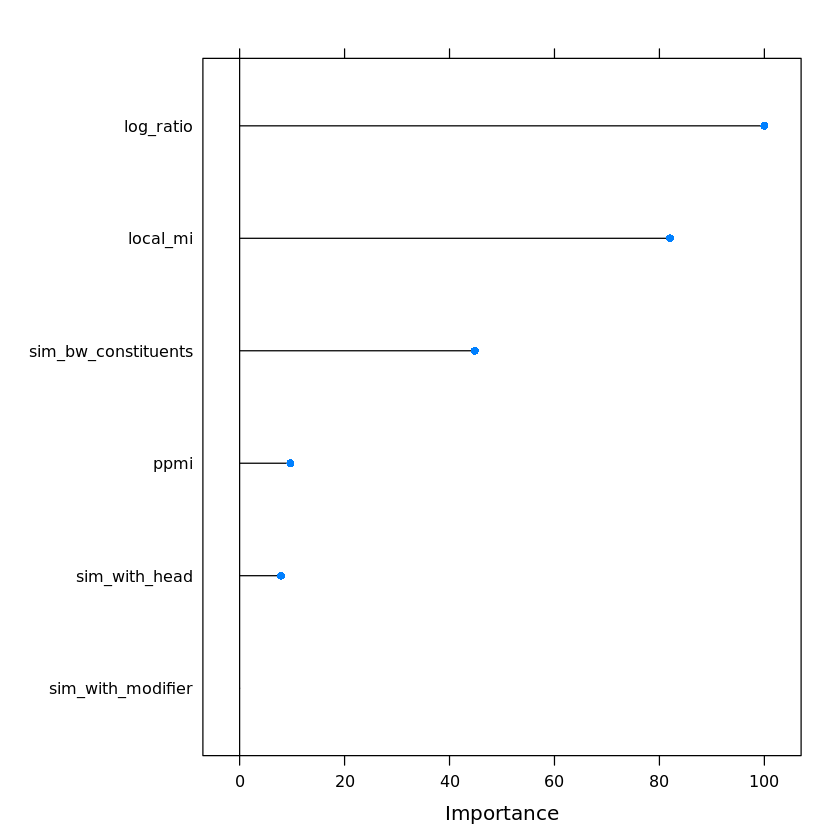

In [14]:
plot(varImp(ridge))